### Importación de bibliotecas necesarias

In [137]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

## Extraccion de los datos

### 2015

In [448]:
df_2015 = pd.read_csv("../data/2015.csv")
print(df_2015.head())  


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [449]:
df_2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [450]:
df_2015['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [451]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [452]:
df_2015[df_2015['Country'] == 'Lithuania']


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
55,Lithuania,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649


In [453]:
null_values= df_2015.isnull().sum()
print("Valores nulos:\n", null_values)


Valores nulos:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [454]:
duplicados = df_2015.duplicated()

print(df_2015[duplicados])


Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []


### 2016

In [455]:
df_2016 = pd.read_csv("../data/2016.csv")
print(df_2016.head())  


       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

In [456]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [457]:
df_2016['Country'].unique()

array(['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada',
       'Netherlands', 'New Zealand', 'Australia', 'Sweden', 'Israel',
       'Austria', 'United States', 'Costa Rica', 'Puerto Rico', 'Germany',
       'Brazil', 'Belgium', 'Ireland', 'Luxembourg', 'Mexico',
       'Singapore', 'United Kingdom', 'Chile', 'Panama', 'Argentina',
       'Czech Republic', 'United Arab Emirates', 'Uruguay', 'Malta',
       'Colombia', 'France', 'Thailand', 'Saudi Arabia', 'Taiwan',
       'Qatar', 'Spain', 'Algeria', 'Guatemala', 'Suriname', 'Kuwait',
       'Bahrain', 'Trinidad and Tobago', 'Venezuela', 'Slovakia',
       'El Salvador', 'Malaysia', 'Nicaragua', 'Uzbekistan', 'Italy',
       'Ecuador', 'Belize', 'Japan', 'Kazakhstan', 'Moldova', 'Russia',
       'Poland', 'South Korea', 'Bolivia', 'Lithuania', 'Belarus',
       'North Cyprus', 'Slovenia', 'Peru', 'Turkmenistan', 'Mauritius',
       'Libya', 'Latvia', 'Cyprus', 'Paraguay', 'Romania', 'Estonia',
       'Jamaica', 'Croa

In [458]:
null_values= df_2016.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [459]:
duplicados = df_2016.duplicated()

print(df_2016[duplicados])


Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []


### 2017

In [460]:
df_2017 = pd.read_csv("../data/2017.csv")
print(df_2017.head())  


       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0 

In [461]:
df_2017["Country"].unique()

array(['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland',
       'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile',
       'United Arab Emirates', 'Brazil', 'Czech Republic', 'Argentina',
       'Mexico', 'Singapore', 'Malta', 'Uruguay', 'Guatemala', 'Panama',
       'France', 'Thailand', 'Taiwan Province of China', 'Spain', 'Qatar',
       'Colombia', 'Saudi Arabia', 'Trinidad and Tobago', 'Kuwait',
       'Slovakia', 'Bahrain', 'Malaysia', 'Nicaragua', 'Ecuador',
       'El Salvador', 'Poland', 'Uzbekistan', 'Italy', 'Russia', 'Belize',
       'Japan', 'Lithuania', 'Algeria', 'Latvia', 'South Korea',
       'Moldova', 'Romania', 'Bolivia', 'Turkmenistan', 'Kazakhstan',
       'North Cyprus', 'Slovenia', 'Peru', 'Mauritius', 'Cyprus',
       'Estonia', 'Belarus', 'Libya', 'Turkey', 'Paraguay',
       'Hong Kong S.A.R., China', '

In [462]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [463]:
null_values= df_2017.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64


In [464]:
duplicados = df_2017.duplicated()

print(df_2017[duplicados])


Empty DataFrame
Columns: [Country, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom, Generosity, Trust..Government.Corruption., Dystopia.Residual]
Index: []


### 2018

In [465]:
df_2018 = pd.read_csv("../data/2018.csv")
print(df_2018.head())  


   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                

In [466]:
df_2018["Country or region"].unique()

array(['Finland', 'Norway', 'Denmark', 'Iceland', 'Switzerland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'United Kingdom', 'Austria', 'Costa Rica', 'Ireland', 'Germany',
       'Belgium', 'Luxembourg', 'United States', 'Israel',
       'United Arab Emirates', 'Czech Republic', 'Malta', 'France',
       'Mexico', 'Chile', 'Taiwan', 'Panama', 'Brazil', 'Argentina',
       'Guatemala', 'Uruguay', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Malaysia', 'Spain', 'Colombia', 'Trinidad & Tobago', 'Slovakia',
       'El Salvador', 'Nicaragua', 'Poland', 'Bahrain', 'Uzbekistan',
       'Kuwait', 'Thailand', 'Italy', 'Ecuador', 'Belize', 'Lithuania',
       'Slovenia', 'Romania', 'Latvia', 'Japan', 'Mauritius', 'Jamaica',
       'South Korea', 'Northern Cyprus', 'Russia', 'Kazakhstan', 'Cyprus',
       'Bolivia', 'Estonia', 'Paraguay', 'Peru', 'Kosovo', 'Moldova',
       'Turkmenistan', 'Hungary', 'Libya', 'Philippines', 'Honduras',
       'Belarus', 'Turkey

In [467]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [468]:
null_values= df_2018.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64


In [469]:
# Mostrar filas con al menos un valor nulo en 2015
null_rows = df_2018[df_2018.isnull().any(axis=1)]
print("Filas con valores nulos en 2018:")
print(null_rows)

Filas con valores nulos en 2018:
    Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                        NaN  


In [470]:
duplicados = df_2018.duplicated()

print(df_2018[duplicados])

Empty DataFrame
Columns: [Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []


### 2019

In [471]:
df_2019 = pd.read_csv("../data/2019.csv")
print(df_2019.head())  


   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [472]:
df_2019["Country or region"].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

In [473]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [474]:
null_values= df_2019.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [475]:
duplicados = df_2019.duplicated()

print(df_2018[duplicados])

Empty DataFrame
Columns: [Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []


## Datos combinados 

### Unir los datasets por columnas en comun 

In [476]:
print('Columnas 2015:', df_2015.columns.tolist())
print('Columnas 2016:', df_2016.columns.tolist())
print('Columnas 2017:', df_2017.columns.tolist())
print('Columnas 2018:', df_2018.columns.tolist())
print('Columnas 2019:', df_2019.columns.tolist())

Columnas 2015: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
Columnas 2016: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
Columnas 2017: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
Columnas 2018: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
Columnas 2019: ['Overall rank', 'Country or re

In [477]:
# Renombrar columnas
df_2015 = df_2015.rename(columns={
    'Country': 'Country_or_region',
    'Family': 'Social_support',
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Economy (GDP per Capita)': 'GDP_per_capita',
    'Health (Life Expectancy)': 'Healthy_life_expectancy',
    'Trust (Government Corruption)': 'Perceptions_of_corruption'
})
df_2016 = df_2016.rename(columns={
    'Country': 'Country_or_region',
    'Family': 'Social_support',
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Economy (GDP per Capita)': 'GDP_per_capita',
    'Health (Life Expectancy)': 'Healthy_life_expectancy',
    'Trust (Government Corruption)': 'Perceptions_of_corruption'
})
df_2017 = df_2017.rename(columns={
    'Country': 'Country_or_region',
    'Happiness.Score': 'Happiness_Score',
    'Family': 'Social_support',
    'Happiness.Rank': 'Happiness_Rank',
    'Economy..GDP.per.Capita.': 'GDP_per_capita',
    'Health..Life.Expectancy.': 'Healthy_life_expectancy',
    'Trust..Government.Corruption.': 'Perceptions_of_corruption',
    'Dystopia.Residual': 'Dystopia_Residual'
})
df_2018 = df_2018.rename(columns={
    'Country or region': 'Country_or_region',
    'Score': 'Happiness_Score',
    'Social support': 'Social_support',
    'Overall rank': 'Happiness_Rank',
    'GDP per capita': 'GDP_per_capita',
    'Healthy life expectancy': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Perceptions_of_corruption'
})
df_2019 = df_2019.rename(columns={
    'Country or region': 'Country_or_region',
    'Social support': 'Social_support',
    'Score': 'Happiness_Score',
    'Overall rank': 'Happiness_Rank',
    'GDP per capita': 'GDP_per_capita',
    'Healthy life expectancy': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Perceptions_of_corruption'
})

# Verificar columnas renombradas
print('Columnas 2015 (renombradas):', df_2015.columns.tolist())
print('Columnas 2016 (renombradas):', df_2016.columns.tolist())
print('Columnas 2017 (renombradas):', df_2017.columns.tolist())
print('Columnas 2018 (renombradas):', df_2018.columns.tolist())
print('Columnas 2019 (renombradas):', df_2019.columns.tolist())

Columnas 2015 (renombradas): ['Country_or_region', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Standard Error', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom', 'Perceptions_of_corruption', 'Generosity', 'Dystopia Residual']
Columnas 2016 (renombradas): ['Country_or_region', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom', 'Perceptions_of_corruption', 'Generosity', 'Dystopia Residual']
Columnas 2017 (renombradas): ['Country_or_region', 'Happiness_Rank', 'Happiness_Score', 'Whisker.high', 'Whisker.low', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom', 'Generosity', 'Perceptions_of_corruption', 'Dystopia_Residual']
Columnas 2018 (renombradas): ['Happiness_Rank', 'Country_or_region', 'Happiness_Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom', 'Generosity', 'Perceptions_of_cor

In [478]:
# Encontrar columnas comunes
common_columns = list(set(df_2015.columns) & set(df_2016.columns) & set(df_2017.columns) & 
                      set(df_2018.columns) & set(df_2019.columns))
print('Columnas comunes:', common_columns)



Columnas comunes: ['Country_or_region', 'Generosity', 'Happiness_Rank', 'Perceptions_of_corruption', 'Freedom', 'GDP_per_capita', 'Happiness_Score', 'Social_support', 'Healthy_life_expectancy']


In [479]:
# Agregar columna de año
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

selected_features =  ['Freedom', 'Generosity', 'Happiness_Rank', 'Country_or_region', 'Perceptions_of_corruption', 'GDP_per_capita', 'Healthy_life_expectancy', 'Happiness_Score', 'Social_support']

# Combinar DataFrames
df = pd.concat([
    df_2015[selected_features + ['Year']],
    df_2016[selected_features + ['Year']],
    df_2017[selected_features + ['Year']],
    df_2018[selected_features + ['Year']],
    df_2019[selected_features + ['Year']]
], ignore_index=True)

# Guardar datos combinados
df.head()

,Freedom,Generosity,Happiness_Rank,Country_or_region,Perceptions_of_corruption,GDP_per_capita,Healthy_life_expectancy,Happiness_Score,Social_support,Year
0,0.66557,0.29678,1,Switzerland,0.41978,1.39651,0.94143,7.587,1.34951,2015
1,0.62877,0.43630,2,Iceland,0.14145,1.30232,0.94784,7.561,1.40223,2015
2,0.64938,0.34139,3,Denmark,0.48357,1.32548,0.87464,7.527,1.36058,2015
3,0.66973,0.34699,4,Norway,0.36503,1.45900,0.88521,7.522,1.33095,2015
4,0.63297,0.45811,5,Canada,0.32957,1.32629,0.90563,7.427,1.32261,2015


### Nulos y duplicados 

In [480]:
null_values= df.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Freedom                      0
Generosity                   0
Happiness_Rank               0
Country_or_region            0
Perceptions_of_corruption    1
GDP_per_capita               0
Healthy_life_expectancy      0
Happiness_Score              0
Social_support               0
Year                         0
dtype: int64


In [481]:
# Revisar valores de Perceptions_of_corruption para United Arab Emirates en todos los años
for year, df_year in [(2015, df_2015), (2016, df_2016), (2017, df_2017), (2018, df_2018), (2019, df_2019)]:
    uae_data = df_year[df_year['Country_or_region'] == 'United Arab Emirates']
    if not uae_data.empty:
        print(f"Año {year}:")
        print(uae_data[['Country_or_region', 'Perceptions_of_corruption']])

Año 2015:
       Country_or_region  Perceptions_of_corruption
19  United Arab Emirates                    0.38583
Año 2016:
       Country_or_region  Perceptions_of_corruption
27  United Arab Emirates                    0.35561
Año 2017:
       Country_or_region  Perceptions_of_corruption
20  United Arab Emirates                    0.32449
Año 2018:
       Country_or_region  Perceptions_of_corruption
19  United Arab Emirates                        NaN
Año 2019:
       Country_or_region  Perceptions_of_corruption
20  United Arab Emirates                      0.182


In [482]:
imputed_value = (0.32449 + 0.182) / 2  # Promedio de 2017 y 2019
df.loc[(df['Country_or_region'] == 'United Arab Emirates') & (df['Year'] == 2018), 'Perceptions_of_corruption'] = imputed_value
print(f"Valor imputado para United Arab Emirates (2018): {imputed_value}")
print(df[(df['Country_or_region'] == 'United Arab Emirates') & (df['Year'] == 2018)][['Country_or_region', 'Year', 'Perceptions_of_corruption']])

Valor imputado para United Arab Emirates (2018): 0.253245
        Country_or_region  Year  Perceptions_of_corruption
489  United Arab Emirates  2018                   0.253245


In [483]:
null_values= df.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Freedom                      0
Generosity                   0
Happiness_Rank               0
Country_or_region            0
Perceptions_of_corruption    0
GDP_per_capita               0
Healthy_life_expectancy      0
Happiness_Score              0
Social_support               0
Year                         0
dtype: int64


In [484]:
duplicados = df.duplicated()

print(df[duplicados])

Empty DataFrame
Columns: [Freedom, Generosity, Happiness_Rank, Country_or_region, Perceptions_of_corruption, GDP_per_capita, Healthy_life_expectancy, Happiness_Score, Social_support, Year]
Index: []


In [485]:
df.shape

(782, 10)

### Estadisticas descriptivas 

In [486]:
df.describe()

,Freedom,Generosity,Happiness_Rank,Perceptions_of_corruption,GDP_per_capita,Healthy_life_expectancy,Happiness_Score,Social_support,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,0.411091,0.218576,78.698210,0.125599,0.916047,0.612416,5.379018,1.078392,2016.993606
std,0.152880,0.122321,45.182384,0.105847,0.407340,0.248309,1.127456,0.329548,1.417364
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.693000,0.000000,2015.000000
25%,0.309768,0.130000,40.000000,0.054250,0.606500,0.440183,4.509750,0.869363,2016.000000
50%,0.431000,0.201982,79.000000,0.091033,0.982205,0.647310,5.322000,1.124735,2017.000000
75%,0.531000,0.278832,118.000000,0.156243,1.236187,0.808000,6.189500,1.327250,2018.000000
max,0.724000,0.838075,158.000000,0.551910,2.096000,1.141000,7.769000,1.644000,2019.000000


### Correlacion entre variables

In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Freedom                    782 non-null    float64
 1   Generosity                 782 non-null    float64
 2   Happiness_Rank             782 non-null    int64  
 3   Country_or_region          782 non-null    object 
 4   Perceptions_of_corruption  782 non-null    float64
 5   GDP_per_capita             782 non-null    float64
 6   Healthy_life_expectancy    782 non-null    float64
 7   Happiness_Score            782 non-null    float64
 8   Social_support             782 non-null    float64
 9   Year                       782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [488]:
correlation_matrix = df[['Happiness_Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom', 'Generosity', 'Perceptions_of_corruption','Happiness_Rank', 'Year']].corr()
print("Matriz de correlación:\n", correlation_matrix)

Matriz de correlación:
                            Happiness_Score  GDP_per_capita  Social_support  \
Happiness_Score                   1.000000        0.789284        0.648799   
GDP_per_capita                    0.789284        1.000000        0.585966   
Social_support                    0.648799        0.585966        1.000000   
Healthy_life_expectancy           0.742456        0.784338        0.572650   
Freedom                           0.551258        0.340511        0.420361   
Generosity                        0.137578       -0.014560       -0.037262   
Perceptions_of_corruption         0.399568        0.308850        0.124797   
Happiness_Rank                   -0.992066       -0.794791       -0.644842   
Year                              0.007065        0.019768        0.367431   

                           Healthy_life_expectancy   Freedom  Generosity  \
Happiness_Score                           0.742456  0.551258    0.137578   
GDP_per_capita                            0

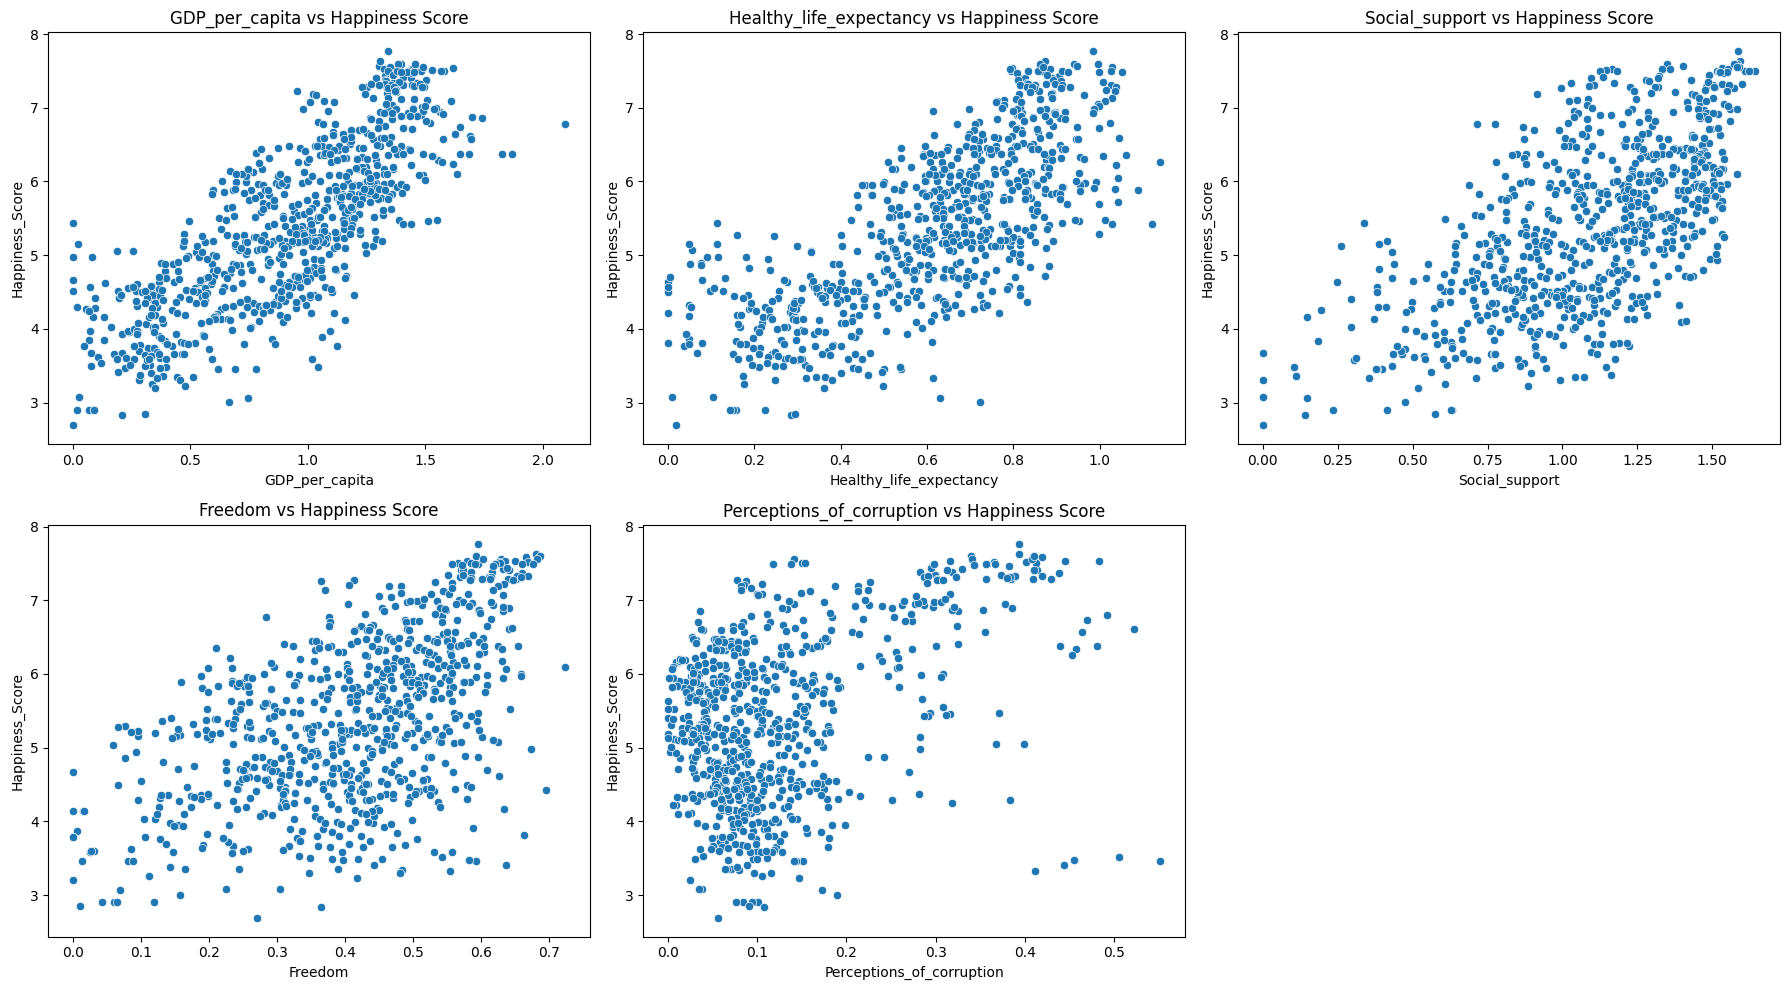

In [489]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['GDP_per_capita', 'Healthy_life_expectancy', 'Social_support', 
            'Freedom', 'Perceptions_of_corruption']

# Crear figura con subplots (2 filas x 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # ajusta tamaño si lo deseas
axes = axes.flatten()  # Para iterar fácilmente

# Graficar cada feature
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='Happiness_Score', ax=axes[i])
    axes[i].set_title(f'{feature} vs Happiness Score')

# Eliminar subplot extra si hay menos de 6
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### Agrupar paises 

In [490]:
# Diccionario de mapeo de países a regiones
region_mapping = {
    'Switzerland': 'Western Europe', 'Iceland': 'Western Europe', 'Denmark': 'Western Europe', 'Norway': 'Western Europe',
    'Finland': 'Western Europe', 'Netherlands': 'Western Europe', 'Sweden': 'Western Europe', 'Austria': 'Western Europe',
    'Luxembourg': 'Western Europe', 'Ireland': 'Western Europe', 'Belgium': 'Western Europe', 'United Kingdom': 'Western Europe',
    'Germany': 'Western Europe', 'France': 'Western Europe', 'Spain': 'Western Europe', 'Malta': 'Western Europe',
    'Italy': 'Western Europe', 'Slovenia': 'Western Europe', 'Portugal': 'Western Europe', 'Greece': 'Western Europe',
    'Canada': 'North America', 'United States': 'North America', 'Puerto Rico': 'North America',
    'New Zealand': 'Australia and New Zealand', 'Australia': 'Australia and New Zealand',
    'Israel': 'Middle East and Northern Africa', 'United Arab Emirates': 'Middle East and Northern Africa',
    'Oman': 'Middle East and Northern Africa', 'Qatar': 'Middle East and Northern Africa', 'Saudi Arabia': 'Middle East and Northern Africa',
    'Kuwait': 'Middle East and Northern Africa', 'Bahrain': 'Middle East and Northern Africa', 'Libya': 'Middle East and Northern Africa',
    'Algeria': 'Middle East and Northern Africa', 'Turkey': 'Middle East and Northern Africa', 'Jordan': 'Middle East and Northern Africa',
    'Morocco': 'Middle East and Northern Africa', 'Tunisia': 'Middle East and Northern Africa', 'Palestinian Territories': 'Middle East and Northern Africa',
    'Iran': 'Middle East and Northern Africa', 'Iraq': 'Middle East and Northern Africa', 'Egypt': 'Middle East and Northern Africa',
    'Yemen': 'Middle East and Northern Africa', 'Lebanon': 'Middle East and Northern Africa', 'Syria': 'Middle East and Northern Africa',
    'Costa Rica': 'Latin America and Caribbean', 'Mexico': 'Latin America and Caribbean', 'Brazil': 'Latin America and Caribbean',
    'Venezuela': 'Latin America and Caribbean', 'Panama': 'Latin America and Caribbean', 'Chile': 'Latin America and Caribbean',
    'Argentina': 'Latin America and Caribbean', 'Uruguay': 'Latin America and Caribbean', 'Colombia': 'Latin America and Caribbean',
    'Suriname': 'Latin America and Caribbean', 'Trinidad and Tobago': 'Latin America and Caribbean', 'El Salvador': 'Latin America and Caribbean',
    'Guatemala': 'Latin America and Caribbean', 'Ecuador': 'Latin America and Caribbean', 'Bolivia': 'Latin America and Caribbean',
    'Paraguay': 'Latin America and Caribbean', 'Nicaragua': 'Latin America and Caribbean', 'Peru': 'Latin America and Caribbean',
    'Jamaica': 'Latin America and Caribbean', 'Dominican Republic': 'Latin America and Caribbean', 'Honduras': 'Latin America and Caribbean',
    'Haiti': 'Latin America and Caribbean', 'Belize': 'Latin America and Caribbean', 'Trinidad & Tobago': 'Latin America and Caribbean',
    'Singapore': 'Southeastern Asia', 'Thailand': 'Southeastern Asia', 'Malaysia': 'Southeastern Asia', 'Indonesia': 'Southeastern Asia',
    'Vietnam': 'Southeastern Asia', 'Philippines': 'Southeastern Asia', 'Laos': 'Southeastern Asia', 'Cambodia': 'Southeastern Asia',
    'Myanmar': 'Southeastern Asia',
    'Czech Republic': 'Central and Eastern Europe', 'Uzbekistan': 'Central and Eastern Europe', 'Slovakia': 'Central and Eastern Europe',
    'Kazakhstan': 'Central and Eastern Europe', 'Moldova': 'Central and Eastern Europe', 'Belarus': 'Central and Eastern Europe',
    'Poland': 'Central and Eastern Europe', 'Croatia': 'Central and Eastern Europe', 'Russia': 'Central and Eastern Europe',
    'North Cyprus': 'Central and Eastern Europe', 'Cyprus': 'Central and Eastern Europe', 'Kosovo': 'Central and Eastern Europe',
    'Turkmenistan': 'Central and Eastern Europe', 'Estonia': 'Central and Eastern Europe', 'Kyrgyzstan': 'Central and Eastern Europe',
    'Azerbaijan': 'Central and Eastern Europe', 'Montenegro': 'Central and Eastern Europe', 'Romania': 'Central and Eastern Europe',
    'Serbia': 'Central and Eastern Europe', 'Latvia': 'Central and Eastern Europe', 'Macedonia': 'Central and Eastern Europe',
    'Albania': 'Central and Eastern Europe', 'Bosnia and Herzegovina': 'Central and Eastern Europe', 'Hungary': 'Central and Eastern Europe',
    'Ukraine': 'Central and Eastern Europe', 'Bulgaria': 'Central and Eastern Europe', 'Armenia': 'Central and Eastern Europe',
    'Georgia': 'Central and Eastern Europe', 'Tajikistan': 'Central and Eastern Europe', 'Northern Cyprus': 'Central and Eastern Europe',
    'North Macedonia': 'Central and Eastern Europe',
    'Taiwan': 'Eastern Asia', 'Japan': 'Eastern Asia', 'South Korea': 'Eastern Asia', 'Hong Kong': 'Eastern Asia',
    'China': 'Eastern Asia', 'Mongolia': 'Eastern Asia', 'Taiwan Province of China': 'Eastern Asia',
    'Hong Kong S.A.R., China': 'Eastern Asia',
    'Nigeria': 'Sub-Saharan Africa', 'Zambia': 'Sub-Saharan Africa', 'Mozambique': 'Sub-Saharan Africa', 'Lesotho': 'Sub-Saharan Africa',
    'Swaziland': 'Sub-Saharan Africa', 'South Africa': 'Sub-Saharan Africa', 'Ghana': 'Sub-Saharan Africa', 'Zimbabwe': 'Sub-Saharan Africa',
    'Liberia': 'Sub-Saharan Africa', 'Sudan': 'Sub-Saharan Africa', 'Congo (Kinshasa)': 'Sub-Saharan Africa', 'Ethiopia': 'Sub-Saharan Africa',
    'Sierra Leone': 'Sub-Saharan Africa', 'Mauritania': 'Sub-Saharan Africa', 'Kenya': 'Sub-Saharan Africa', 'Djibouti': 'Sub-Saharan Africa',
    'Botswana': 'Sub-Saharan Africa', 'Malawi': 'Sub-Saharan Africa', 'Cameroon': 'Sub-Saharan Africa', 'Angola': 'Sub-Saharan Africa',
    'Mali': 'Sub-Saharan Africa', 'Congo (Brazzaville)': 'Sub-Saharan Africa', 'Comoros': 'Sub-Saharan Africa', 'Uganda': 'Sub-Saharan Africa',
    'Senegal': 'Sub-Saharan Africa', 'Gabon': 'Sub-Saharan Africa', 'Niger': 'Sub-Saharan Africa', 'Tanzania': 'Sub-Saharan Africa',
    'Madagascar': 'Sub-Saharan Africa', 'Central African Republic': 'Sub-Saharan Africa', 'Chad': 'Sub-Saharan Africa',
    'Guinea': 'Sub-Saharan Africa', 'Ivory Coast': 'Sub-Saharan Africa', 'Burkina Faso': 'Sub-Saharan Africa', 'Rwanda': 'Sub-Saharan Africa',
    'Benin': 'Sub-Saharan Africa', 'Burundi': 'Sub-Saharan Africa', 'Togo': 'Sub-Saharan Africa', 'Mauritius': 'Sub-Saharan Africa',
    'Somalia': 'Sub-Saharan Africa', 'Namibia': 'Sub-Saharan Africa', 'South Sudan': 'Sub-Saharan Africa', 'Somaliland Region': 'Sub-Saharan Africa',
    'Gambia': 'Sub-Saharan Africa',
    'Bhutan': 'Southern Asia', 'Pakistan': 'Southern Asia', 'Bangladesh': 'Southern Asia', 'India': 'Southern Asia',
    'Nepal': 'Southern Asia', 'Sri Lanka': 'Southern Asia', 'Afghanistan': 'Southern Asia', 'Lithuania': 'Central and Eastern Europe', 'Somaliland region': 'Sub-Saharan Africa'
}

# Agregar columna Region
df['Region'] = df['Country_or_region'].map(region_mapping)

# Verificar
print("Regiones únicas:", df['Region'].unique())
print("Distribución de regiones:\n", df['Region'].value_counts())

Regiones únicas: ['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
Distribución de regiones:
 Region
Sub-Saharan Africa                 196
Central and Eastern Europe         150
Latin America and Caribbean        110
Western Europe                     100
Middle East and Northern Africa     96
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        30
North America                       11
Australia and New Zealand           10
Name: count, dtype: int64


In [491]:
null_values= df.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Freedom                      0
Generosity                   0
Happiness_Rank               0
Country_or_region            0
Perceptions_of_corruption    0
GDP_per_capita               0
Healthy_life_expectancy      0
Happiness_Score              0
Social_support               0
Year                         0
Region                       0
dtype: int64


In [492]:
df = df.drop("Country_or_region", axis=1)


In [493]:
df.head()

,Freedom,Generosity,Happiness_Rank,Perceptions_of_corruption,GDP_per_capita,Healthy_life_expectancy,Happiness_Score,Social_support,Year,Region
0,0.66557,0.29678,1,0.41978,1.39651,0.94143,7.587,1.34951,2015,Western Europe
1,0.62877,0.43630,2,0.14145,1.30232,0.94784,7.561,1.40223,2015,Western Europe
2,0.64938,0.34139,3,0.48357,1.32548,0.87464,7.527,1.36058,2015,Western Europe
3,0.66973,0.34699,4,0.36503,1.45900,0.88521,7.522,1.33095,2015,Western Europe
4,0.63297,0.45811,5,0.32957,1.32629,0.90563,7.427,1.32261,2015,North America


### Codificar Region con One-Hot Encoding

In [494]:
def creating_dummy_variables(df):
    df = pd.get_dummies(df, columns=["Region"])
    return df
df = creating_dummy_variables(df)


In [497]:
df.head()

,Freedom,Generosity,Happiness_Rank,Perceptions_of_corruption,GDP_per_capita,Healthy_life_expectancy,Happiness_Score,Social_support,Year,Region_Australia_and_New_Zealand,Region_Central_and_Eastern_Europe,Region_Eastern_Asia,Region_Latin_America_and_Caribbean,Region_Middle_East_and_Northern_Africa,Region_North_America,Region_Southeastern_Asia,Region_Southern_Asia,Region_Sub-Saharan_Africa,Region_Western_Europe
0,0.66557,0.29678,1,0.41978,1.39651,0.94143,7.587,1.34951,2015,False,False,False,False,False,False,False,False,False,True
1,0.62877,0.43630,2,0.14145,1.30232,0.94784,7.561,1.40223,2015,False,False,False,False,False,False,False,False,False,True
2,0.64938,0.34139,3,0.48357,1.32548,0.87464,7.527,1.36058,2015,False,False,False,False,False,False,False,False,False,True
3,0.66973,0.34699,4,0.36503,1.45900,0.88521,7.522,1.33095,2015,False,False,False,False,False,False,False,False,False,True
4,0.63297,0.45811,5,0.32957,1.32629,0.90563,7.427,1.32261,2015,False,False,False,False,False,True,False,False,False,False


In [496]:
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)


### Codificar booleanas

In [498]:
# Identificar todas las columnas booleanas
boolean_cols = df.select_dtypes(include='bool').columns.tolist()

# Convertirlas a enteros (0 y 1)
df[boolean_cols] = df[boolean_cols].astype(int)

print("Booleanas codificadas a enteros (1/0):", boolean_cols)

Booleanas codificadas a enteros (1/0): ['Region_Australia_and_New_Zealand', 'Region_Central_and_Eastern_Europe', 'Region_Eastern_Asia', 'Region_Latin_America_and_Caribbean', 'Region_Middle_East_and_Northern_Africa', 'Region_North_America', 'Region_Southeastern_Asia', 'Region_Southern_Asia', 'Region_Sub-Saharan_Africa', 'Region_Western_Europe']


### Eliminar columnas innecesarias 

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Freedom                                  782 non-null    float64
 1   Generosity                               782 non-null    float64
 2   Happiness_Rank                           782 non-null    int64  
 3   Perceptions_of_corruption                782 non-null    float64
 4   GDP_per_capita                           782 non-null    float64
 5   Healthy_life_expectancy                  782 non-null    float64
 6   Happiness_Score                          782 non-null    float64
 7   Social_support                           782 non-null    float64
 8   _Region_Australia and New Zealand        782 non-null    int64  
 9   _Region_Central and Eastern Europe       782 non-null    int64  
 10  _Region_Eastern Asia                     782 non-n

In [401]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# PCA para GDP_per_capita y Healthy_life_expectancy
pca_cols = ['GDP_per_capita', 'Healthy_life_expectancy']
pca_data = df[pca_cols]
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_data_scaled)

# Renombrar PCA_Component_1 a Economic_Health_Index
df['Economic_Health_Index'] = pca_result[:, 0]  # Primer componente
# No incluir PCA_Component_2
print("Varianza explicada por PCA:", pca.explained_variance_ratio_)
print("Suma de varianza explicada:", sum(pca.explained_variance_ratio_))

# Calcular correlación de componentes con Happiness_Score
correlation_matrix = df[['Happiness_Score', 'Economic_Health_Index']].corr()
print("Correlaciones con Happiness_Score (PCA):\n", correlation_matrix['Happiness_Score'])

Varianza explicada por PCA: [0.89216879 0.10783121]
Suma de varianza explicada: 1.0
Correlaciones con Happiness_Score (PCA):
 Happiness_Score          1.000000
Economic_Health_Index    0.810833
Name: Happiness_Score, dtype: float64


In [499]:
df = df.drop(columns=[ 'Happiness_Rank'])

### Guardar el dataset final

In [500]:
df.to_csv('../data/clean_dataset.csv', index=False)
print("\nGuardado en 'data/clean_dataset.csv'")


Guardado en 'data/clean_dataset.csv'


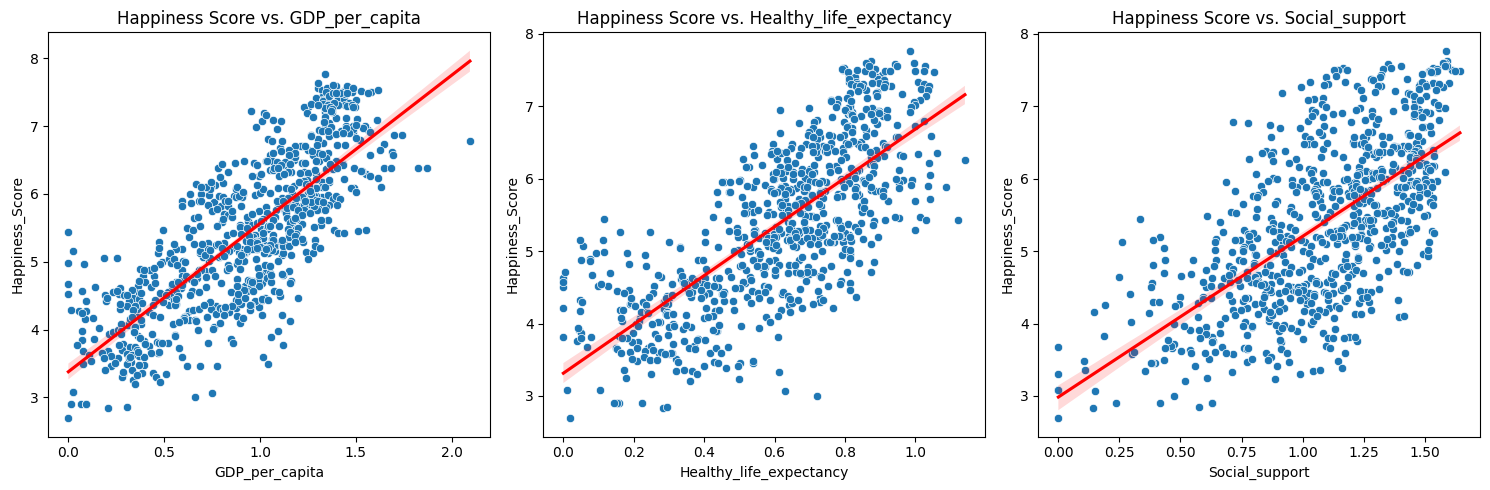

In [191]:
plt.figure(figsize=(15, 5))
for i, var in enumerate(['GDP_per_capita', 'Healthy_life_expectancy', 'Social_support'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=var, y='Happiness_Score', data=df)
    sns.regplot(x=var, y='Happiness_Score', data=df, scatter=False, color='red')
    plt.title(f'Happiness Score vs. {var}')
plt.tight_layout()
plt.show()

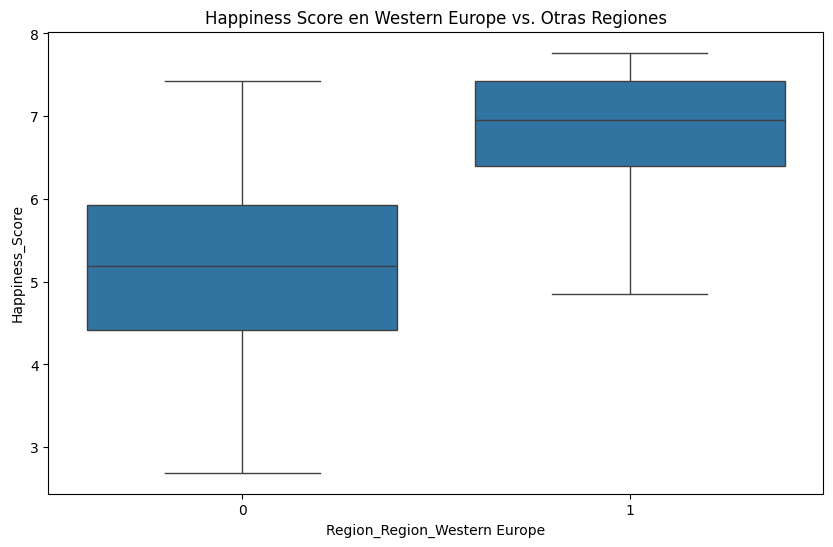

In [192]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region_Region_Western Europe', y='Happiness_Score', data=df)
plt.title('Happiness Score en Western Europe vs. Otras Regiones')
plt.show()

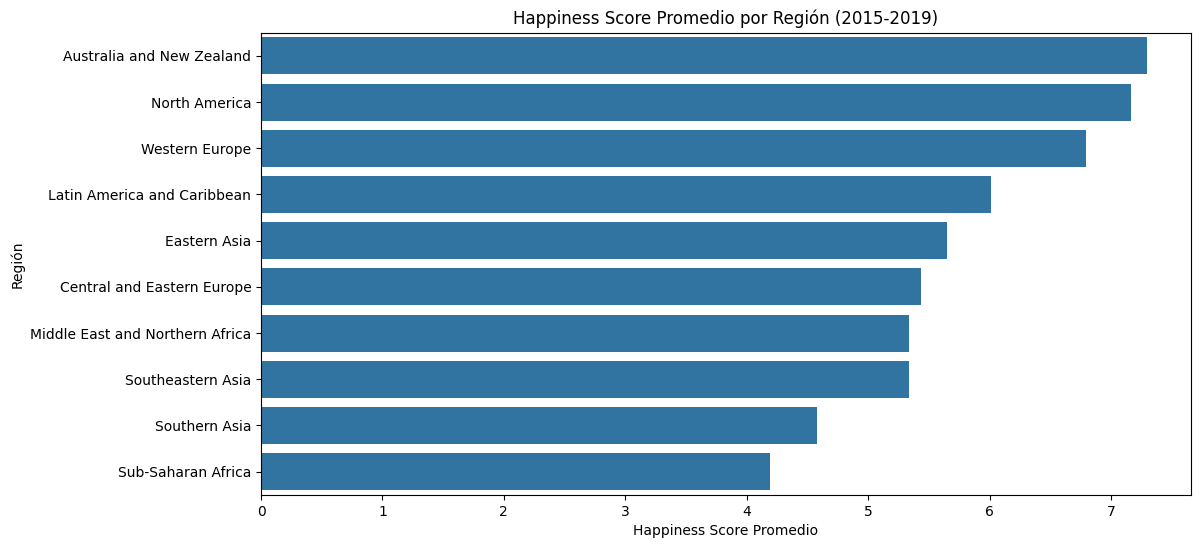

In [193]:
region_cols = [col for col in df.columns if col.startswith('Region_Region_')]
region_means = []
for region in region_cols:
    region_name = region.replace('Region_Region_', '')
    mean_score = df[df[region] == 1]['Happiness_Score'].mean()
    region_means.append({'Region': region_name, 'Happiness_Score': mean_score})

region_df = pd.DataFrame(region_means)
plt.figure(figsize=(12, 6))
sns.barplot(x='Happiness_Score', y='Region', data=region_df.sort_values('Happiness_Score', ascending=False))
plt.title('Happiness Score Promedio por Región (2015-2019)')
plt.xlabel('Happiness Score Promedio')
plt.ylabel('Región')
plt.show()

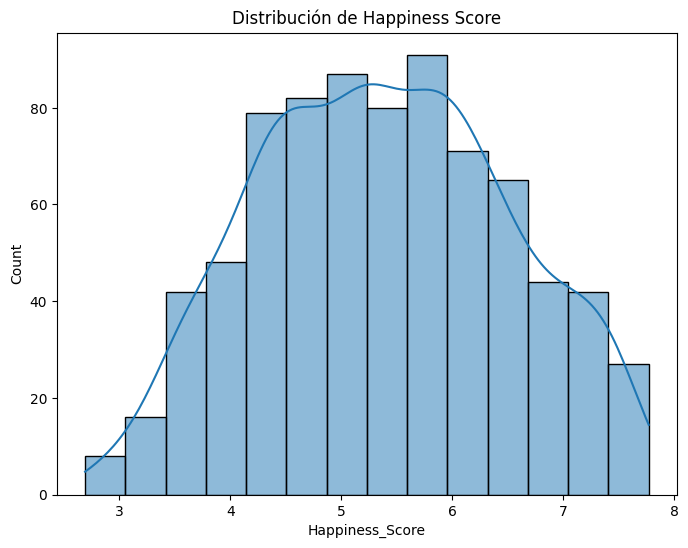

In [194]:
# Distribución de Happiness_Score
plt.figure(figsize=(8, 6))
sns.histplot(df['Happiness_Score'], kde=True)
plt.title('Distribución de Happiness Score')
plt.show()

In [195]:
# Eliminar Happiness_Rank por redundancia
df = df.drop('Happiness_Rank', axis=1)

# Transformación de Generosity (manejo de sesgo)
df['Generosity_BoxCox'], _ = boxcox(df['Generosity'] + 1)  # +1 para evitar valores <= 0

KeyError: "['Happiness_Rank'] not found in axis"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = ['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
                'Freedom', 'Generosity_BoxCox', 'Perceptions_of_corruption', 'Economic_Health_Index']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = df[['GDP_per_capita', 'Healthy_life_expectancy', 'Social_support', 
            'Freedom', 'Generosity_BoxCox', 'Perceptions_of_corruption']]
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nFactor de Inflación de Varianza (VIF):")
print(vif_data)


Factor de Inflación de Varianza (VIF):
                    Variable        VIF
0             GDP_per_capita  17.935318
1    Healthy_life_expectancy  19.269201
2             Social_support  17.235203
3                    Freedom  13.173176
4          Generosity_BoxCox   6.331728
5  Perceptions_of_corruption   3.459265


# Opciones


Factor de Inflación de Varianza (VIF) Opción 1 (sin Social_support):
                    Variable        VIF
0      Economic_Health_Index   6.376256
1                    Freedom  10.466799
2          Generosity_BoxCox   6.038235
3  Perceptions_of_corruption   3.186099


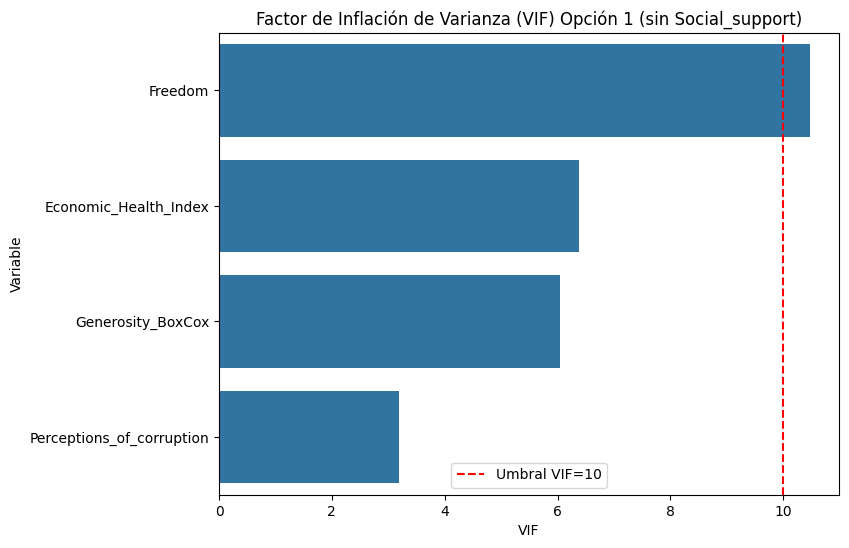

In [127]:
# Opción 1: Eliminar Social_support para reducir multicolinealidad
df_option1 = df.drop(['GDP_per_capita', 'Healthy_life_expectancy', 'Social_support'], axis=1)

# Recalcular VIF para Opción 1
X_vif_option1 = df_option1[['Economic_Health_Index', 'Freedom', 'Generosity_BoxCox', 'Perceptions_of_corruption']]
vif_data_option1 = pd.DataFrame()
vif_data_option1['Variable'] = X_vif_option1.columns
vif_data_option1['VIF'] = [variance_inflation_factor(X_vif_option1.values, i) for i in range(X_vif_option1.shape[1])]
print("\nFactor de Inflación de Varianza (VIF) Opción 1 (sin Social_support):")
print(vif_data_option1)

# Visualizar VIF Opción 1
plt.figure(figsize=(8, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data_option1.sort_values('VIF', ascending=False))
plt.title('Factor de Inflación de Varianza (VIF) Opción 1 (sin Social_support)')
plt.xlabel('VIF')
plt.ylabel('Variable')
plt.axvline(x=10, color='red', linestyle='--', label='Umbral VIF=10')
plt.legend()
plt.show()

In [129]:
# Opción 2: Aplicar PCA a todas las variables numéricas
numeric_cols = ['Economic_Health_Index', 'Social_support', 'Freedom', 'Generosity_BoxCox', 'Perceptions_of_corruption']
X_pca = df[numeric_cols]
scaler_pca2 = StandardScaler()
X_pca_scaled = scaler_pca2.fit_transform(X_pca)
pca2 = PCA(n_components=0.95)  # Conservar 95% de la varianza
X_pca_transformed = pca2.fit_transform(X_pca_scaled)
print("\nVarianza explicada por PCA (todas las variables numéricas):", pca2.explained_variance_ratio_)
print("Suma de varianza explicada:", sum(pca2.explained_variance_ratio_))

# Crear DataFrame con componentes principales
pca_cols = [f'PC{i+1}' for i in range(X_pca_transformed.shape[1])]
df_pca = pd.DataFrame(X_pca_transformed, columns=pca_cols)
categorical_cols = [col for col in df.columns if col.startswith('Region_Region_') or col.startswith('_Year_')]
df_pca = pd.concat([df_pca, df[categorical_cols]], axis=1)
df_pca['Happiness_Score'] = df['Happiness_Score']

# Normalización de variables numéricas (Opción 1)
scaler = MinMaxScaler()
df_option1[['Economic_Health_Index', 'Freedom', 'Generosity_BoxCox', 'Perceptions_of_corruption']] = scaler.fit_transform(
    df_option1[['Economic_Health_Index', 'Freedom', 'Generosity_BoxCox', 'Perceptions_of_corruption']]
)

# Normalización para df_pca
scaler_pca3 = MinMaxScaler()
df_pca[pca_cols] = scaler_pca3.fit_transform(df_pca[pca_cols])



Varianza explicada por PCA (todas las variables numéricas): [0.44165618 0.26415446 0.12761588 0.10274247 0.063831  ]
Suma de varianza explicada: 0.9999999999999999



Factor de Inflación de Varianza (VIF) Opción 3 (sin Social_support ni Freedom):
                    Variable       VIF
0      Economic_Health_Index  4.191197
1          Generosity_BoxCox  4.323828
2  Perceptions_of_corruption  2.968490


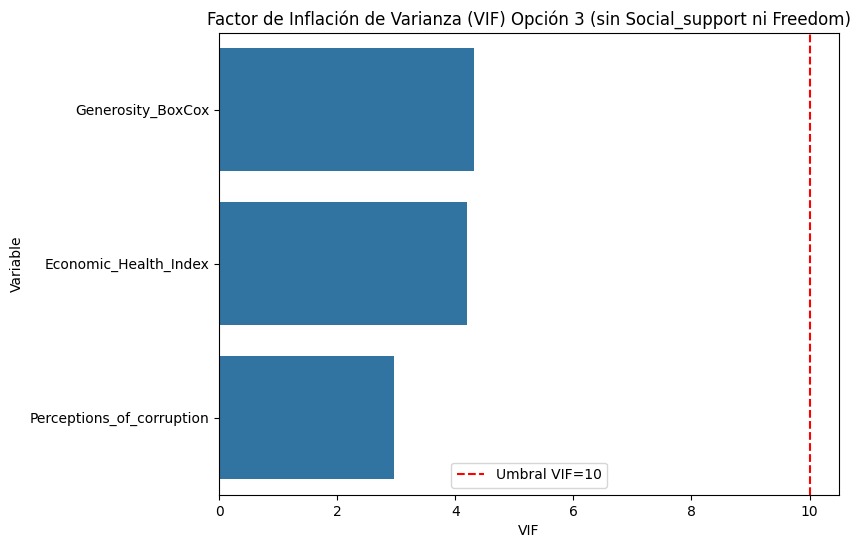

In [133]:
# Opción 3: Eliminar Social_support y Freedom
df_option3 = df.drop(['GDP_per_capita', 'Healthy_life_expectancy', 'Social_support', 'Freedom'], axis=1)

# Recalcular VIF para Opción 3
X_vif_option3 = df_option3[['Economic_Health_Index', 'Generosity_BoxCox', 'Perceptions_of_corruption']]
vif_data_option3 = pd.DataFrame()
vif_data_option3['Variable'] = X_vif_option3.columns
vif_data_option3['VIF'] = [variance_inflation_factor(X_vif_option3.values, i) for i in range(X_vif_option3.shape[1])]
print("\nFactor de Inflación de Varianza (VIF) Opción 3 (sin Social_support ni Freedom):")
print(vif_data_option3)

# Visualizar VIF Opción 3
plt.figure(figsize=(8, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data_option3.sort_values('VIF', ascending=False))
plt.title('Factor de Inflación de Varianza (VIF) Opción 3 (sin Social_support ni Freedom)')
plt.xlabel('VIF')
plt.ylabel('Variable')
plt.axvline(x=10, color='red', linestyle='--', label='Umbral VIF=10')
plt.legend()
plt.show()

# Normalización de variables numéricas (Opción 3)
scaler_option3 = MinMaxScaler()
df_option3[['Economic_Health_Index', 'Generosity_BoxCox', 'Perceptions_of_corruption']] = scaler_option3.fit_transform(
    df_option3[['Economic_Health_Index', 'Generosity_BoxCox', 'Perceptions_of_corruption']]
)

### Modelo

In [135]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

In [136]:
# Función para evaluar modelos
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\nResultados para {name}:")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"R²: {r2_score(y_test, y_pred):.4f}")
    cv_scores = cross_val_score(model, pd.concat([X_train, X_test]), pd.concat([y_train, y_test]), cv=5, scoring='r2')
    print(f"R² Validación Cruzada (media): {cv_scores.mean():.4f}")
    return model

# Modelado con Opción 1: Sin Social_support
X_option1 = df_option1.drop(['Happiness_Score'], axis=1)
y_option1 = df_option1['Happiness_Score']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_option1, y_option1, test_size=0.2, random_state=42)

# Modelado con Opción 2: PCA
X_pca = df_pca.drop(['Happiness_Score'], axis=1)
y_pca = df_pca['Happiness_Score']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Modelado con Opción 3: Sin Social_support ni Freedom
X_option3 = df_option3.drop(['Happiness_Score'], axis=1)
y_option3 = df_option3['Happiness_Score']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_option3, y_option3, test_size=0.2, random_state=42)

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),  # Probar diferentes alphas más adelante
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Evaluar modelos para Opción 1
print("\nEvaluación con Economic_Health_Index (sin Social_support):")
for name, model in models.items():
    evaluate_model(model, X_train1, X_test1, y_train1, y_test1, f"{name} (Option 1)")

# Evaluar modelos para Opción 2 (PCA)
print("\nEvaluación con PCA:")
for name, model in models.items():
    evaluate_model(model, X_train_pca, X_test_pca, y_train_pca, y_test_pca, f"{name} (PCA)")

# Evaluar modelos para Opción 3 (sin Social_support ni Freedom)
print("\nEvaluación con Economic_Health_Index (sin Social_support ni Freedom):")
for name, model in models.items():
    evaluate_model(model, X_train3, X_test3, y_train3, y_test3, f"{name} (Option 3)")

# Optimización de hiperparámetros para Random Forest (Opción 1)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train1, y_train1)
print("\nMejores parámetros Random Forest (Option 1):", grid_search_rf.best_params_)
print("Mejor R² Random Forest (Option 1):", grid_search_rf.best_score_)

# Optimización de hiperparámetros para XGBoost (Opción 1)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='r2')
grid_search_xgb.fit(X_train1, y_train1)
print("\nMejores parámetros XGBoost (Option 1):", grid_search_xgb.best_params_)
print("Mejor R² XGBoost (Option 1):", grid_search_xgb.best_score_)

# Optimización de alpha para Ridge Regression (Opción 1)
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train1, y_train1)
print("\nMejores parámetros Ridge Regression (Option 1):", grid_search_ridge.best_params_)
print("Mejor R² Ridge Regression (Option 1):", grid_search_ridge.best_score_)


Evaluación con Economic_Health_Index (sin Social_support):

Resultados para Linear Regression (Option 1):
MSE: 0.3194
RMSE: 0.5651
MAE: 0.4162
R²: 0.7374
R² Validación Cruzada (media): 0.7855

Resultados para Ridge Regression (Option 1):
MSE: 0.3260
RMSE: 0.5710
MAE: 0.4214
R²: 0.7320
R² Validación Cruzada (media): 0.7838

Resultados para Random Forest (Option 1):
MSE: 0.2048
RMSE: 0.4525
MAE: 0.3512
R²: 0.8317
R² Validación Cruzada (media): 0.8482

Resultados para XGBoost (Option 1):
MSE: 0.2198
RMSE: 0.4688
MAE: 0.3637
R²: 0.8193
R² Validación Cruzada (media): 0.8408

Resultados para Gradient Boosting (Option 1):
MSE: 0.2421
RMSE: 0.4920
MAE: 0.3811
R²: 0.8010
R² Validación Cruzada (media): 0.8267

Evaluación con PCA:

Resultados para Linear Regression (PCA):
MSE: 0.2889
RMSE: 0.5375
MAE: 0.3948
R²: 0.7625
R² Validación Cruzada (media): 0.8127

Resultados para Ridge Regression (PCA):
MSE: 0.2943
RMSE: 0.5425
MAE: 0.3983
R²: 0.7581
R² Validación Cruzada (media): 0.8106

Resultados pa

In [131]:
# Función para evaluar modelos
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nResultados para {name}:")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"R²: {r2_score(y_test, y_pred):.4f}")
    cv_scores = cross_val_score(model, pd.concat([X_train, X_test]), pd.concat([y_train, y_test]), cv=5, scoring='r2')
    print(f"R² Validación Cruzada (media): {cv_scores.mean():.4f}")
    return model

# Modelado con Opción 1: Sin Social_support
X_option1 = df_option1.drop(['Happiness_Score'], axis=1)
y_option1 = df_option1['Happiness_Score']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_option1, y_option1, test_size=0.2, random_state=42)

# Modelado con Opción 2: PCA
X_pca = df_pca.drop(['Happiness_Score'], axis=1)
y_pca = df_pca['Happiness_Score']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Evaluar modelos para Opción 1
print("\nEvaluación con Economic_Health_Index (sin Social_support):")
for name, model in models.items():
    evaluate_model(model, X_train1, X_test1, y_train1, y_test1, f"{name} (Option 1)")

# Evaluar modelos para Opción 2 (PCA)
print("\nEvaluación con PCA:")
for name, model in models.items():
    evaluate_model(model, X_train_pca, X_test_pca, y_train_pca, y_test_pca, f"{name} (PCA)")

# Optimización de hiperparámetros para Random Forest (Opción 1)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train1, y_train1)
print("\nMejores parámetros Random Forest (Option 1):", grid_search_rf.best_params_)
print("Mejor R² Random Forest (Option 1):", grid_search_rf.best_score_)


Evaluación con Economic_Health_Index (sin Social_support):

Resultados para Linear Regression (Option 1):
MSE: 0.3194
MAE: 0.4162
R²: 0.7374
R² Validación Cruzada (media): 0.7855

Resultados para Ridge Regression (Option 1):
MSE: 0.3260
MAE: 0.4214
R²: 0.7320
R² Validación Cruzada (media): 0.7838

Resultados para Random Forest (Option 1):
MSE: 0.2048
MAE: 0.3512
R²: 0.8317
R² Validación Cruzada (media): 0.8482

Resultados para XGBoost (Option 1):
MSE: 0.2198
MAE: 0.3637
R²: 0.8193
R² Validación Cruzada (media): 0.8408

Evaluación con PCA:

Resultados para Linear Regression (PCA):
MSE: 0.2889
MAE: 0.3948
R²: 0.7625
R² Validación Cruzada (media): 0.8127

Resultados para Ridge Regression (PCA):
MSE: 0.2943
MAE: 0.3983
R²: 0.7581
R² Validación Cruzada (media): 0.8106

Resultados para Random Forest (PCA):
MSE: 0.2277
MAE: 0.3587
R²: 0.8128
R² Validación Cruzada (media): 0.8415

Resultados para XGBoost (PCA):
MSE: 0.2341
MAE: 0.3574
R²: 0.8075
R² Validación Cruzada (media): 0.8268

Mejores 